<a href="https://colab.research.google.com/github/KiranVarghese25/Nlp/blob/main/NLP_Lab4_2348525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question:
###Implement the Weather Prediction using Recurrent Neural Network.

In [57]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [4]:
#Loading the dataset
data=pd.read_excel('/content/KIRAN BASIL VARGHESE 2348525 - seattle-weather.xlsx')
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01 00:00:00,0.0,12.8,5.0,4.7,drizzle
1,2012-02-01 00:00:00,10.9,10.6,2.8,4.5,rain
2,2012-03-01 00:00:00,0.8,11.7,7.2,2.3,rain
3,2012-04-01 00:00:00,20.3,12.2,5.6,4.7,rain
4,2012-05-01 00:00:00,1.3,8.9,2.8,6.1,rain


In [6]:
#Checking for null values
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [13]:
#Label Encoding (For the Weather column)
le=LabelEncoder()
data['weather']=le.fit_transform(data['weather'])
data.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01 00:00:00,0.0,12.8,5.0,4.7,0
1,2012-02-01 00:00:00,10.9,10.6,2.8,4.5,2
2,2012-03-01 00:00:00,0.8,11.7,7.2,2.3,2
3,2012-04-01 00:00:00,20.3,12.2,5.6,4.7,2
4,2012-05-01 00:00:00,1.3,8.9,2.8,6.1,2


In [18]:
data['date']=pd.to_datetime(data['date'])
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-02-01,10.9,10.6,2.8,4.5,2
2,2012-03-01,0.8,11.7,7.2,2.3,2
3,2012-04-01,20.3,12.2,5.6,4.7,2
4,2012-05-01,1.3,8.9,2.8,6.1,2


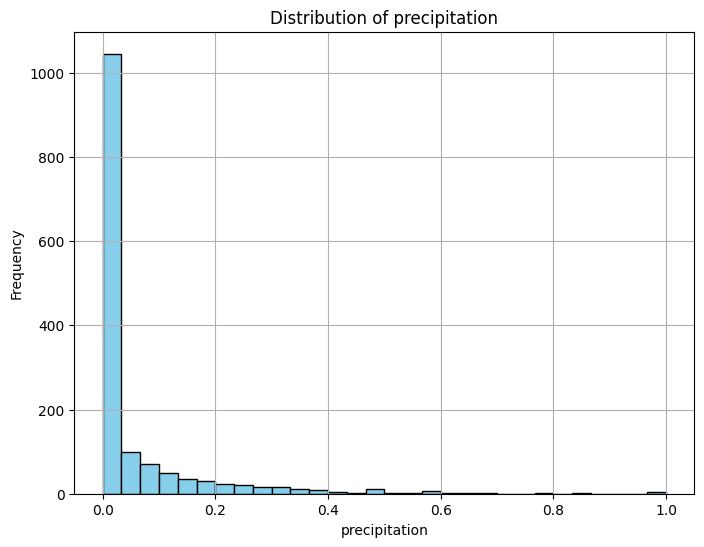

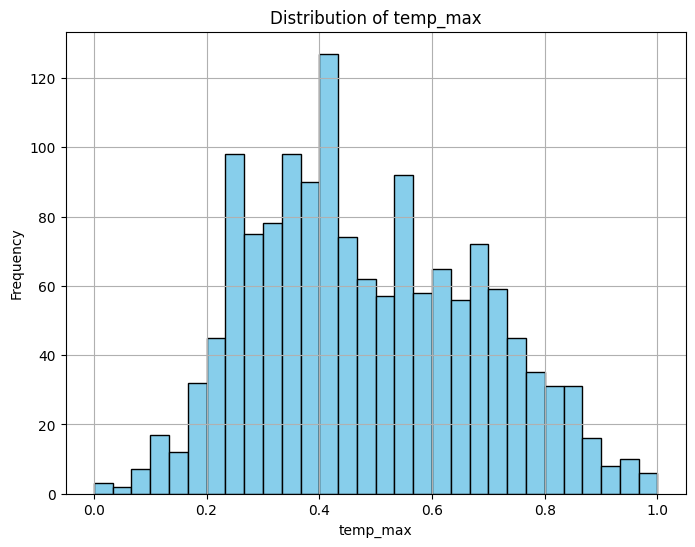

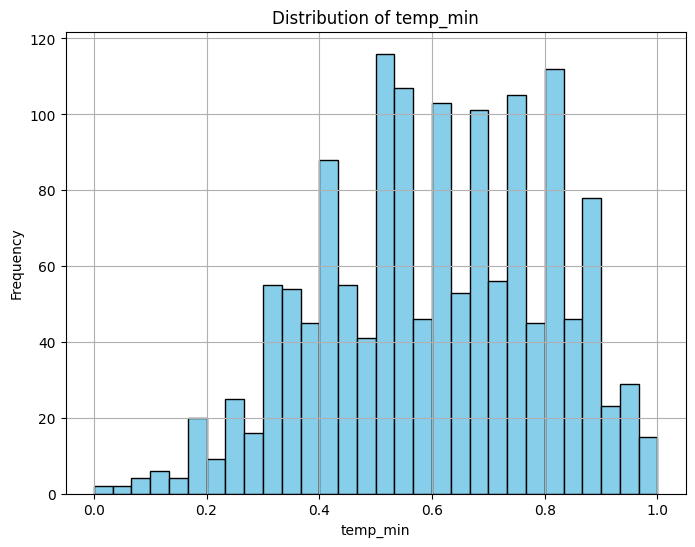

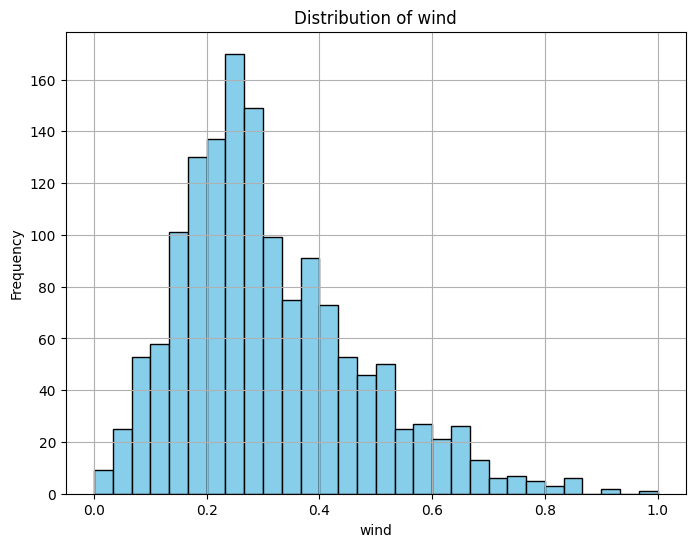

In [34]:
#Distribution before Normalization
num_cols=data.drop(['date','weather'],axis=1)


#Graph for each of the columns
for col in num_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [40]:
#Normalization (MinMaxScaler)
scaler=MinMaxScaler()
columns=data.drop(['date','weather'],axis=1)
for col in columns:
  data[col]=scaler.fit_transform(data[[col]])
data.head()




,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.000000,0.387097,0.476378,0.472527,0
1,2012-02-01,0.194991,0.327957,0.389764,0.450549,2
2,2012-03-01,0.014311,0.357527,0.562992,0.208791,2
3,2012-04-01,0.363148,0.370968,0.500000,0.472527,2
4,2012-05-01,0.023256,0.282258,0.389764,0.626374,2


In [53]:
features_normalized=data.drop(['date','weather'],axis=1)
sequence_length=7
generator = TimeseriesGenerator(features_normalized.values, features_normalized.values, length=sequence_length+1, batch_size=1)
X = []
y = []
for i in range(len(generator)):
    inputs, output = generator[i]
    X.append(inputs)
    y.append(output[:, -1])

X = np.array(X)
y = np.array(y)

In [61]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train.reshape((X_train.shape[0], X_train.shape[2], X_train.shape[3]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[2], X_test.shape[3]))

#Model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(4)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
19/19 [==============================] - 6s 141ms/step - loss: 0.0493 - val_loss: 0.0316
Epoch 2/50
19/19 [==============================] - 0s 18ms/step - loss: 0.0285 - val_loss: 0.0249
Epoch 3/50
19/19 [==============================] - 0s 12ms/step - loss: 0.0247 - val_loss: 0.0238
Epoch 4/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0239 - val_loss: 0.0225
Epoch 5/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0233 - val_loss: 0.0219
Epoch 6/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0231 - val_loss: 0.0215
Epoch 7/50
19/19 [==============================] - 0s 11ms/step - loss: 0.0226 - val_loss: 0.0213
Epoch 8/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0213
Epoch 9/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0226 - val_loss: 0.0211
Epoch 10/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0224 - val_loss: 0.0213
Epoch 11

In [69]:
#Model Evaluation
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)



10/10 [==============================] - 0s 5ms/step - loss: 0.0200
Test Loss: 0.02000466361641884


#Inference

##From the above test loss score we can conclude that our predictions are off from the actual values by 0.02 units , which means the loss is low and our model is performing well